#Introduction to Neural Networks and the Perceptron

Neural Networks are a set of algorithms, modeled loosely after the human brain, designed to recognize patterns. They interpret  data through a kind of machine perception, labeling, or clustering of raw input. The patterns they recognize are numerical, contained in vectors, into which all data, be it images, sound, text, or time series, must be translated.


The simplest neural network is that of a perceptron.

## Understanding the Perceptron

The perceptron is a fundamental building block of neural networks, conceptualized as a single layer neural network. It is essentially a linear classifier used for binary classification tasks.

### Key Components of a Perceptron:

1. **Inputs (Features):**
   - Represented as $ X = [x_1, x_2, ..., x_n] $
   - $( x_1, x_2, ..., x_n )$ are the features of the input data.

2. **Weights:**
   - Represented as $ W = [w_1, w_2, ..., w_n] $
   - Each input feature $( x_i )$ has an associated weight $( w_i )$, indicating the importance of that feature.

3. **Bias:**
   - Represented as $( b )$
   - A constant value added to the input to shift the decision boundary away from the origin.

4. **Net Input Function:**
   - The perceptron combines the inputs and their weights, summed together, often represented as $$\sum_{i=1}^{n} w_i \cdot x_i + b$$

5. **Activation Function:**
   - A step function to decide the output (often 0 or 1 for binary classification).
   - Output = $( 1 )$ if $$ \sum_{i=1}^{n} w_i \cdot x_i + b > 0 $$, else Output = $( 0 )$.

6. **Learning Rate $(\alpha )$:**
   - A hyperparameter that defines the step size during the weight update.
   - A small learning rate might make the learning process slow, while a large learning rate might lead to overshooting the minimum.

### Learning Process:

- **Initialization:** Start with random weights and bias.
- **For each training sample:**
  - Compute the output.
  - Update weights and bias based on the error (difference between predicted and actual output).

### Weight Update Rule:

The weights are updated as follows:

$$ w_i = w_i + \alpha \cdot (target\_output - predicted\_output) \cdot x_i $$

And the bias:

$$ b = b + \alpha \cdot (target\_output - predicted\_output) $$

# What does this look like in practice?

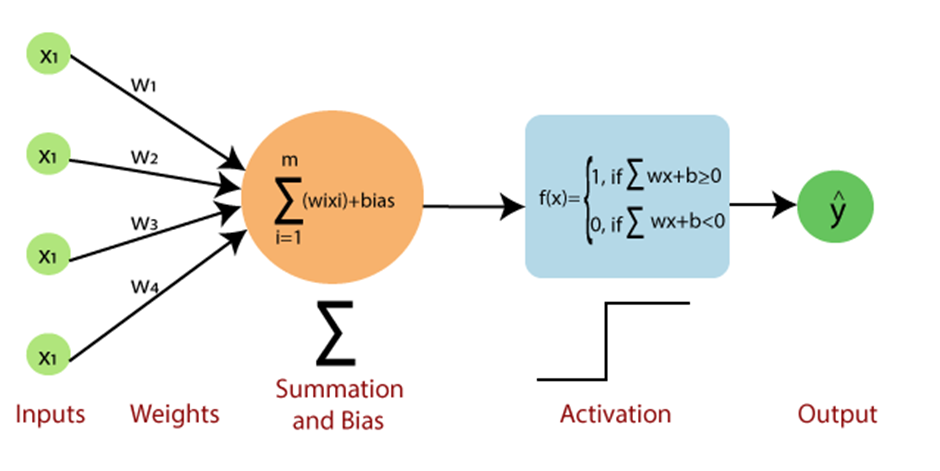

Credit [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40ilyurek%2Fperceptron-model-the-foundation-of-neural-networks-4db25b0148d&psig=AOvVaw0n21R7xwAseVxKFH-i2Fst&ust=1699921640974000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCIDNwOHbv4IDFQAAAAAdAAAAABAD)

# Okay, let's build a perceptron... slowly and simply

## Step 1: Initialize Weights and Bias
We start by initializing the weights and the bias. In this simple example, let's assume we have two input features. Hence, we will have two weights and one bias.


### Weight Initialization in Neural Networks
When initializing weights in neural networks, including perceptrons, it's essential to break symmetry and avoid initializing all weights to the same value, such as zero. This is because if all weights are the same, all neurons in the network will follow the same gradient, and thus, the network will behave as if it has only one neuron in each layer. Random initialization helps in breaking this symmetry.

#### Choosing a Distribution for Initialization:
- **Uniform or Normal Distribution:** Weights can be initialized randomly from a uniform or normal distribution. This is a common practice because it allows the neurons to initially have differing levels of influence on the output, leading to diverse learning paths.

- **Magnitude of Initial Weights:** The scale of initial weights should be small to prevent neurons from saturating. If neurons start in saturated regions of their activation function, their gradients will be almost zero, leading to slow or no learning during training.
- **Variance Scaling:** In deeper networks, it's crucial to maintain the variance of activations and back-propagated gradients. Variance scaling initializers, such as He or Xavier/Glorot initialization, adjust the scale of the distribution based on the number of input and output neurons.


For our simple perceptron, we'll initialize the weights from a normal distribution with a small scale. Since we're not dealing with deep layers here, a basic normal distribution would suffice.

In [ ]:
import numpy as np

# Initializing weights and bias
# Random initialization from a normal distribution
weight1 = np.random.normal()
weight2 = np.random.normal()
bias = np.random.normal()

# Note: The scale of the normal distribution is set to the default value.
# In more complex networks or different contexts, you might choose a specific scale.

#Step 2: Define the Net Input Function
The net input to the perceptron is the weighted sum of the inputs plus the bias.

### Weighted Sum in a Perceptron

The weighted sum in a perceptron is a fundamental concept that involves combining the input features with their respective weights. This sum forms the basis for the perceptron's decision-making process.

#### Definition:

The weighted sum is calculated as follows:

$$ \text{Weighted Sum} = \sum_{i=1}^{n} w_i \cdot x_i + b $$

Where:
- $( w_i )$ is the weight associated with the $( i^{th} )$ input feature.
- $( x_i )$ is the value of the $( i^{th} )$ input feature.
- $( b )$ is the bias term.
- $( n )$ is the number of input features.

#### Purpose:

- **Combining Information:** Each input feature $( x_i )$ is multiplied by its corresponding weight $( w_i )$, which signifies the importance or influence of that feature.
- **Adding Bias:** The bias $( b )$ is added to shift the decision boundary away from the origin, allowing the perceptron to better fit the data.
- **Determining Activation:** The resulting sum is then passed to an activation function, which decides the perceptron's output based on this combined input.

In essence, the weighted sum is the core calculation within a perceptron, integrating all inputs and weights to produce a singular value that represents the input's overall effect before activation.


Here, we'll define a function to calculate this.

In [ ]:
def net_input(x1, x2, weight1, weight2, bias):
    """
    Calculate the net input for the perceptron.

    Parameters:
    x1 (float): Input feature 1
    x2 (float): Input feature 2
    weight1 (float): Weight associated with feature 1
    weight2 (float): Weight associated with feature 2
    bias (float): Bias term

    Returns:
    float: The net input
    """
    # note how similar this looks to our regression equation!!!
    return weight1 * x1 + weight2 * x2 + bias


# Step 3: Define the Activation Function
The perceptron uses a simple step function as its activation function.

### Activation Functions in Neural Networks

#### What is an Activation Function?

An activation function in a neural network, including a perceptron, is a mathematical function that determines the output of a neuron. The function takes the weighted sum of the inputs and bias as its input and transforms it into an output that can be used as input to the next layer or as the final output of the network.

#### Analogy with Logistic Regression:

- In logistic regression, the logistic (sigmoid) function is used to transform the linear combination of inputs into a probability between 0 and 1. Similarly, in neural networks, activation functions transform the input signal into a meaningful output signal.

#### Types of Activation Functions:

1. **Sigmoid or Logistic Function:**
   - Transforms values into a range between 0 and 1.
   - Equation: $ \sigma(x) = \frac{1}{1 + e^{-x}} $
   - Useful for binary classification.

2. **Hyperbolic Tangent (tanh):**
   - Transforms values into a range between -1 and 1.
   - Similar to sigmoid but with a broader output range.

3. **ReLU (Rectified Linear Unit):**
   - Transforms values to zero for all negative inputs and keeps positive values as is.
   - Equation: $ \text{ReLU}(x) = \max(0, x) $
   - Commonly used in deep learning due to its simplicity and efficiency.

4. **Leaky ReLU, ELU, and others:**
   - Variants of ReLU designed to improve performance by addressing certain issues like the dying ReLU problem.

Each type of activation function has its characteristics and is chosen based on the specific requirements of the neural network and the nature of the data being processed. For our perceptron, we'll use the sigmoid function as it's well-suited for binary classification tasks.

In [ ]:
def sigmoid(x):
    """
    Sigmoid activation function. Notice this is the same sigmoid
    equation we were introduced to in Logistic Regression!

    Parameters:
    x (float): The net input value

    Returns:
    float: The output after applying the sigmoid function
    """
    return 1 / (1 + np.exp(-x))


# Step 4: Making a Prediction
Now, let's define a function to make a prediction. This function will use the net input and activation functions we defined earlier.

In [ ]:
def predict(x1, x2, weight1, weight2, bias):
    """
    Make a prediction using the perceptron.

    Parameters:
    x1 (float): Input feature 1
    x2 (float): Input feature 2
    weight1 (float): Weight associated with feature 1
    weight2 (float): Weight associated with feature 2
    bias (float): Bias term

    Returns:
    int: The predicted class (0 or 1)
    """

    net_input_value = net_input(x1, x2, weight1, weight2, bias)
    return 1 if sigmoid(net_input_value) > 0.5 else 0

# Step 5: Update Weights and Bias (Training)

Training a perceptron involves iteratively adjusting the weights and bias based on the error in predictions. This is a simplified version of the training process.

In [ ]:
def train_perceptron(x1, x2, target, weight1, weight2, bias, learning_rate=0.01):
    """
    Train the perceptron (weight and bias update).

    Parameters:
    x1 (float): Input feature 1
    x2 (float): Input feature 2
    target (int): Actual target output
    weight1 (float): Current weight for feature 1
    weight2 (float): Current weight for feature 2
    bias (float): Current bias term
    learning_rate (float): The learning rate for adjustments

    Returns:
    tuple: Updated weight1, weight2, and bias
    """
    prediction = predict(x1, x2, weight1, weight2, bias)
    error = target - prediction

    weight1 = weight1 + learning_rate * error * x1
    weight2 = weight2 + learning_rate * error * x2
    bias = bias + learning_rate * error

    return weight1, weight2, bias


### Let's train this on a simple classification problem of two synthetic slices of data

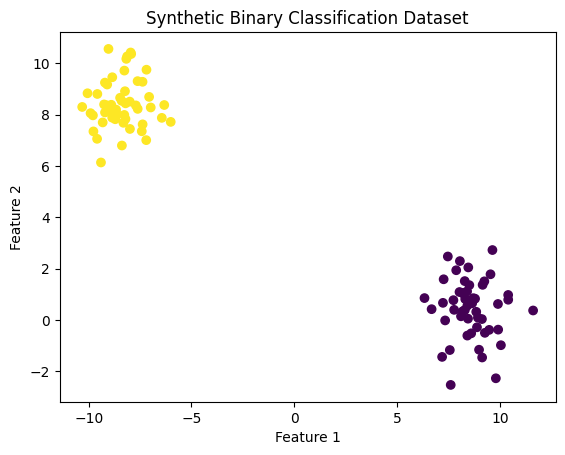

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a synthetic dataset representing two features
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=235)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### Notice that they are fully separated features

We will use this to our advantage to attempt to classify with a simple perceptron.

In [ ]:
# Initializing weights and bias
# Random initialization from a normal distribution
weight1 = np.random.normal()
weight2 = np.random.normal()
bias = np.random.normal()

# Note: The scale of the normal distribution is set to the default value.
# In more complex networks or different contexts, you might choose a specific scale.

# Number of epochs - representing how many times we'll go through the entire dataset
epochs = 10

# Training the perceptron over the dataset for a number of epochs
for epoch in range(epochs):
    for i in range(len(X)):
        x1, x2, target = X[i, 0], X[i, 1], y[i]
        weight1, weight2, bias = train_perceptron(x1, x2, target, weight1, weight2, bias)

# The weight1, weight2, and bias are now trained based on the dataset


# Testing the Perceptron's Performance
After training, you can test the perceptron's performance on either a separate test set or the same dataset (though testing on the same dataset isn't ideal for evaluating generalization performance).

To test the perceptron:

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(X, y, weight1, weight2, bias):
    correct_predictions = 0
    for i in range(len(X)):
        prediction = predict(X[i, 0], X[i, 1], weight1, weight2, bias)
        if prediction == y[i]:
            correct_predictions += 1
    return correct_predictions / len(X)

# Calculate accuracy on the dataset
accuracy = calculate_accuracy(X, y, weight1, weight2, bias)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Introduction to Feedforward Neural Networks

Feedforward Neural Networks are the simplest type of artificial neural network architecture. In this network, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any), and to the output nodes. There are no cycles or loops in the network (a hint at what's to come).

#### Relation to Perceptrons

- **Single Perceptron:** The simplest form of a feedforward network is a single perceptron. The perceptron consists of a single neuron with adjustable weights and a bias, capable of linear binary classification.
- **Multi-Layer Perceptrons (MLPs):** When multiple neurons are connected in layers, forming a network with one or more hidden layers, it becomes a Multi-Layer Perceptron (MLP). MLPs can be viewed as a stack of perceptrons, capable of more complex representations.

#### Applications in Business

Feedforward neural networks, especially MLPs, have a wide range of applications in the business world:

1. **Customer Segmentation:** Classifying customers into different categories based on purchasing behavior, demographics, etc.
2. **Sales Forecasting:** Predicting future sales based on historical data, market trends, and other factors.
3. **Credit Scoring:** Assessing the creditworthiness of potential borrowers by analyzing their credit history and other financial data.
4. **Fraud Detection:** Identifying unusual patterns that may indicate fraudulent activity.
5. **Inventory Management:** Forecasting inventory requirements to optimize stock levels.


### Demonstration using PyTorch

Let's implement a simple MLP using PyTorch for a binary classification task.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=532)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=267)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Defining the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 5)  # 2 input features, 5 hidden nodes
        self.output = nn.Linear(5, 2)  # 5 hidden nodes, 2 output nodes

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

model = MLP()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

# Evaluating the model
with torch.no_grad():
    y_pred = model(X_test)
    correct = (y_pred.argmax(1) == y_test).type(torch.FloatTensor)
    accuracy = correct.mean()
    print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9556


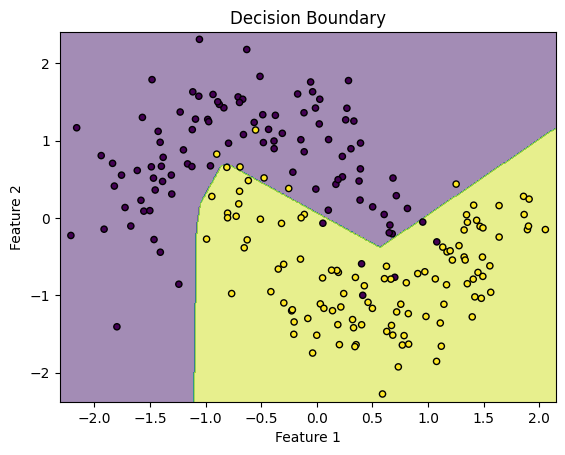

In [ ]:
import numpy as np

def plot_decision_boundary(X, y, model):
    """
    Plots the decision boundary created by a model predicting on X.

    Parameters:
    X (torch.Tensor): The input features.
    y (torch.Tensor): The target labels.
    model (torch.nn.Module): The trained PyTorch neural network.
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.argmax(1).numpy()
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Call the function with your data and model
plot_decision_boundary(X_train, y_train, model)
plt.show()


#### Explanation of the Code

1. **Data Preparation:**
   - We generate a synthetic dataset using `make_moons` and split it into training and testing sets. The data is then standardized for better performance.

2. **Model Definition:**
   - An MLP is defined with one hidden layer (5 neurons) and an output layer. We use the ReLU activation function for the hidden layer.

3. **Training Process:**
   - The model is trained using the Cross-Entropy Loss function and the Adam optimizer over several epochs.

4. **Evaluation:**
   - The model's accuracy is evaluated on the test set.

### Introduction to Backpropagation

Backpropagation, short for "backward propagation of errors," is a fundamental algorithm for training neural networks. It efficiently computes the gradient of the loss function with respect to the weights of the network.

#### Key Concepts:

1. **Gradient Descent:** Backpropagation is used in conjunction with an optimization algorithm like gradient descent. The goal is to minimize the loss function by adjusting the network's weights in the direction that decreases the loss.

2. **Chain Rule of Calculus:** The algorithm relies on the chain rule to calculate the derivatives of the loss function with respect to each weight in the network.

3. **Updating Weights:** After computing these gradients, the weights are updated in the opposite direction of the gradient, usually scaled by a learning rate.

#### Latex Equation for a Simple Update Rule:

In gradient descent, the weights ($ W $) are updated as:

$$W_{new} = W_{old} - \alpha \cdot \frac{\partial L}{\partial W}$$

Where:
- \( $\alpha$ \) is the learning rate.
- \($ \frac{\partial L}{\partial W} $\) is the gradient of the loss function \( $L $\) with respect to the weights \($ W $\).

### Code Demonstration

In this simple example, we'll demonstrate the concept of backpropagation using a single neuron with one weight.

In [ ]:
import numpy as np

# A simple dataset
X = np.array([1, 2, 3, 4])  # Input
y = np.array([2, 4, 6, 8])  # Target

# Initial weight
W = 0.0

# Forward pass (simple linear model)
def forward(X):
    return W * X

# Loss (Mean Squared Error)
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# Gradient
# MSE = 1/N * (w*x - y)^2
# dJ/dw = 1/N * 2x * (w*x - y)
def gradient(X, y, y_predicted):
    return np.dot(2*X, y_predicted - y).mean()

# Training loop
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(X)

    # Calculate loss
    l = loss(y, y_pred)

    # Calculate gradient
    dw = gradient(X, y, y_pred)

    # Update weights
    W -= learning_rate * dw

    print(f'Epoch {epoch+1}: w = {W:.3f}, loss = {l:.8f}')

# After training
print(f'Predicted after training: 4 -> {forward(4):.3f}')

Epoch 1: w = 1.200, loss = 30.00000000
Epoch 2: w = 1.680, loss = 4.80000000
Epoch 3: w = 1.872, loss = 0.76800000
Epoch 4: w = 1.949, loss = 0.12288000
Epoch 5: w = 1.980, loss = 0.01966080
Epoch 6: w = 1.992, loss = 0.00314573
Epoch 7: w = 1.997, loss = 0.00050332
Epoch 8: w = 1.999, loss = 0.00008053
Epoch 9: w = 1.999, loss = 0.00001288
Epoch 10: w = 2.000, loss = 0.00000206
Epoch 11: w = 2.000, loss = 0.00000033
Epoch 12: w = 2.000, loss = 0.00000005
Epoch 13: w = 2.000, loss = 0.00000001
Epoch 14: w = 2.000, loss = 0.00000000
Epoch 15: w = 2.000, loss = 0.00000000
Epoch 16: w = 2.000, loss = 0.00000000
Epoch 17: w = 2.000, loss = 0.00000000
Epoch 18: w = 2.000, loss = 0.00000000
Epoch 19: w = 2.000, loss = 0.00000000
Epoch 20: w = 2.000, loss = 0.00000000
Predicted after training: 4 -> 8.000



### Explanation of the Code

1. **Forward Pass:**
   - We define a simple linear model `forward(X)` that predicts `y` using the current weight `W`.

2. **Computing the Loss:**
   - The `loss` function calculates the Mean Squared Error (MSE) between the predicted values `y_predicted` and the actual values `y`.

3. **Calculating the Gradient:**
   - The `gradient` function computes the derivative of the loss function with respect to the weight `W`.

4. **Updating the Weight:**
   - In each iteration (epoch), we update the weight `W` in the direction that reduces the loss, using the gradient calculated and the learning rate.

5. **Training Loop:**
   - The model goes through the dataset multiple times (epochs), each time updating the weight to minimize the loss.

This simple example illustrates the core idea behind backpropagation and gradient descent in neural network training. The concept scales up to more complex networks with multiple layers and weights, where the calculation of gradients becomes more intricate but follows the same fundamental principles.

### Issues with Feedforward Neural Networks

#### Context and Sequential Data

While feedforward neural networks, including MLPs, are powerful tools for many applications, they have limitations, especially when dealing with sequential data.

1. **Lack of Memory:**
   - Feedforward networks process each input independently. They lack the mechanism to remember previous inputs, which is crucial for tasks where context and sequence matter, such as time series analysis or language processing.

2. **Fixed Input and Output Sizes:**
   - These networks require a fixed-size input and produce a fixed-size output, making them unsuitable for tasks like language translation where the length of the input and output can vary.

### Introduction to Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTMs)

#### Recurrent Neural Networks (RNNs)

RNNs are a class of neural networks designed specifically for sequential data. They address the limitations of feedforward networks by having loops in them, allowing information to persist.

- **Memory:** In an RNN, the output from the neurons can be fed back into the network as input for the next step. This creates a form of internal memory, allowing the network to maintain information across sequence elements.
- **Variable-Length Sequences:** RNNs can handle inputs of varying lengths, making them more flexible for sequential tasks.

#### Long Short-Term Memory (LSTMs)

LSTMs are a special kind of RNN, capable of learning long-term dependencies. They were introduced to overcome the problem of vanishing gradients that can occur in standard RNNs.

- **Structure:** LSTMs have a complex structure with gates that regulate the flow of information. These gates (input, output, and forget gates) decide what information to keep and what to discard, enabling them to capture long-term dependencies.
- **Applications:** LSTMs have shown great success in various applications, including language modeling, translation, speech recognition, and more.

#### High-Level Overview

While RNNs and LSTMs can be more complex to understand and train compared to feedforward networks, they open up a whole new world of possibilities in machine learning, particularly in processing sequential data. They are key to understanding how modern neural networks can handle complex tasks such as predicting the next word in a sentence, generating text, or even composing music. As we delve deeper into these models, we'll explore their architectures, how they learn, and the various applications they are suited for.